# Mode-Turbulence Coupling: Numerical Analysis
# Plots for paper

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import random
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.interpolate as interpolate
from scipy.integrate import RK45
import statistics

### Physical Parameters

In [2]:
# mach number Ma
Ma = 0.1
K = 1
eta = 1

# time step d_tau
d_tau = .01

### Functions of Ma

In [3]:
meandeltaT = 2*np.pi

# variables for generating F1
meanF1 = 0
stdF1 = Ma**3 / (2 * np.pi)
limitF1 = eta * Ma**2 / (2 * np.pi)

# variables for generating F2
meanF2 = 0
stdF2 = Ma**2
limitF2 = eta * Ma**2

### Calculation parameters

In [4]:
L = 10
M = 100
N = 1
m = 100

# h is the time step for the Runge Kutta Method
h = 2*np.pi/100
Tr = K * meandeltaT

### Calculation relations

In [5]:
# Tmax = 2 * pi * M
# delt = N * deltaT

### Initial Conditions

In [6]:
# initial conditions A(0)=1/2*std_F2, dA/dT(0)=0
initial_dAdT = 0
initial_AT = 0

In [7]:
n_bins = 200

axis_font = {'size':'30'}
title_font = {'size':'40'}

### Functions

In [16]:
# Source: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rayleigh.html
#deltaT is the length of each eddy turnover
def fundeltaT(n_bins, M):
    deltaT = []
    rayleigh = np.random.rayleigh(meandeltaT, M)                           
    hist, bin_edges = np.histogram(rayleigh, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    # ensure that deltaT is a multiple of d_tau
    for i in range(M):
        r = np.random.rand(1)
        deltaTtemp = inv_cdf(r)
        if (deltaTtemp % d_tau < 0.05):
            deltaTtemp2 = deltaTtemp - (deltaTtemp % d_tau)
        else:
            deltaTtemp2 = deltaTtemp + d_tau - (deltaTtemp % d_tau)
        deltaT.append(deltaTtemp2)
    count, bins, ignored = plt.hist(rayleigh, 80, density=True)
    plt.title("Rayleigh Distribution")
    plt.xlabel("Delta T")
    plt.show()
    return deltaT

# Source: https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/

# Tturb adds up the delta T's
def funTturb():
    Tturb=[0]
    for i in range(len(deltaT)-1):
        Tturb.append(deltaT[i]+Tturb[i])
    time=Tturb
    time.pop(-1)
    return Tturb, time

# t is the sum of half way points of consecutive delta T's

def funt():
    t=[]
    for i in range(len(deltaT)-1):
        t.append((deltaT[i])/2+(deltaT[i+1])/2)
    return t

def funF1():
    time = [0]
    y = 0
    F1 = []
    for i in range(len(deltaT)):
        Tn = deltaT[i]
        stdevt = ((1 - math.exp(-2 * Tn / Tr)) * stdF1 ** 2) ** (1/2)
        meant = math.exp(-Tn / Tr) * y
        # y is chosen from markov conditional probability function
        y = np.random.normal(meant, stdevt, 2)[0]
        Ttemp = np.linspace(0, deltaT[i], deltaT[i]/d_tau)
        # loops through each eddy
        for j in Ttemp:
            x = j / deltaT[i][0]
            if j == deltaT[i]:
                pass
            else:
                time.append(j+time[-1])
                F1.append(16 * y * x**2 * (1 - x)**2)
    time = time[:-1]
    return F1, time
    
def funF2():
    time = [0]
    y = 0
    F2 = []
    for i in range(len(deltaT)):
        Tn = deltaT[i]
        stdevt = ((1 - math.exp(-2 * Tn / Tr)) * stdF2 ** 2) ** (1/2)
        meant = math.exp(-Tn / Tr) * y
        # y is chosen from markov conditional probability function
        y = np.random.normal(meant, stdevt, 2)[0]
        Ttemp = np.linspace(0, deltaT[i], deltaT[i]/d_tau)
        # loops through each eddy
        for j in Ttemp:
            x = j / deltaT[i][0]
            if j == deltaT[i]:
                pass
            else:
                time.append(j+time[-1])
                F2.append(16 * y * x**2 * (1 - x)**2)
    time = time[:-1]
    return F2, time

# set G1 = 0
def funG1(F1):
    G1=[]
    for i in range(len(F1)):
        G1.append(0)
    return G1

In [17]:
# Average value of Amplitude
def FunAsqr(A):
    Asqr = []
    for i in A:
        Asqr.append(i**2)
    return Asqr

# log(A)
def FunLog(A):
    logA = []
    for i in A:
        logA.append(math.log10(abs(i)))
    return logA

# Root mean square
def FunRMS(A):
    Asqr = []
    for i in A:
        Asqr.append(i**2)
    avg = np.sum(Asqr) / len(Asqr)
    RMS = avg**(1/2)
    return RMS
    

### Parameters

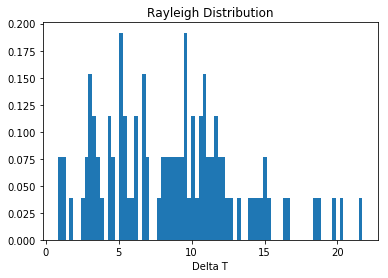

In [18]:
deltaT = fundeltaT(n_bins, M)

Tturb, time = funTturb()

t = funt()

/Users/celiatandon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: DeprecationWarning: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.


<F2^2>^(1/2) =  0.005743551535403412
Average Value of F2  -0.0009107621474915511
Maximum Value of F2  0.018204123558325205
Minimum Value of F2  -0.02438076486767622


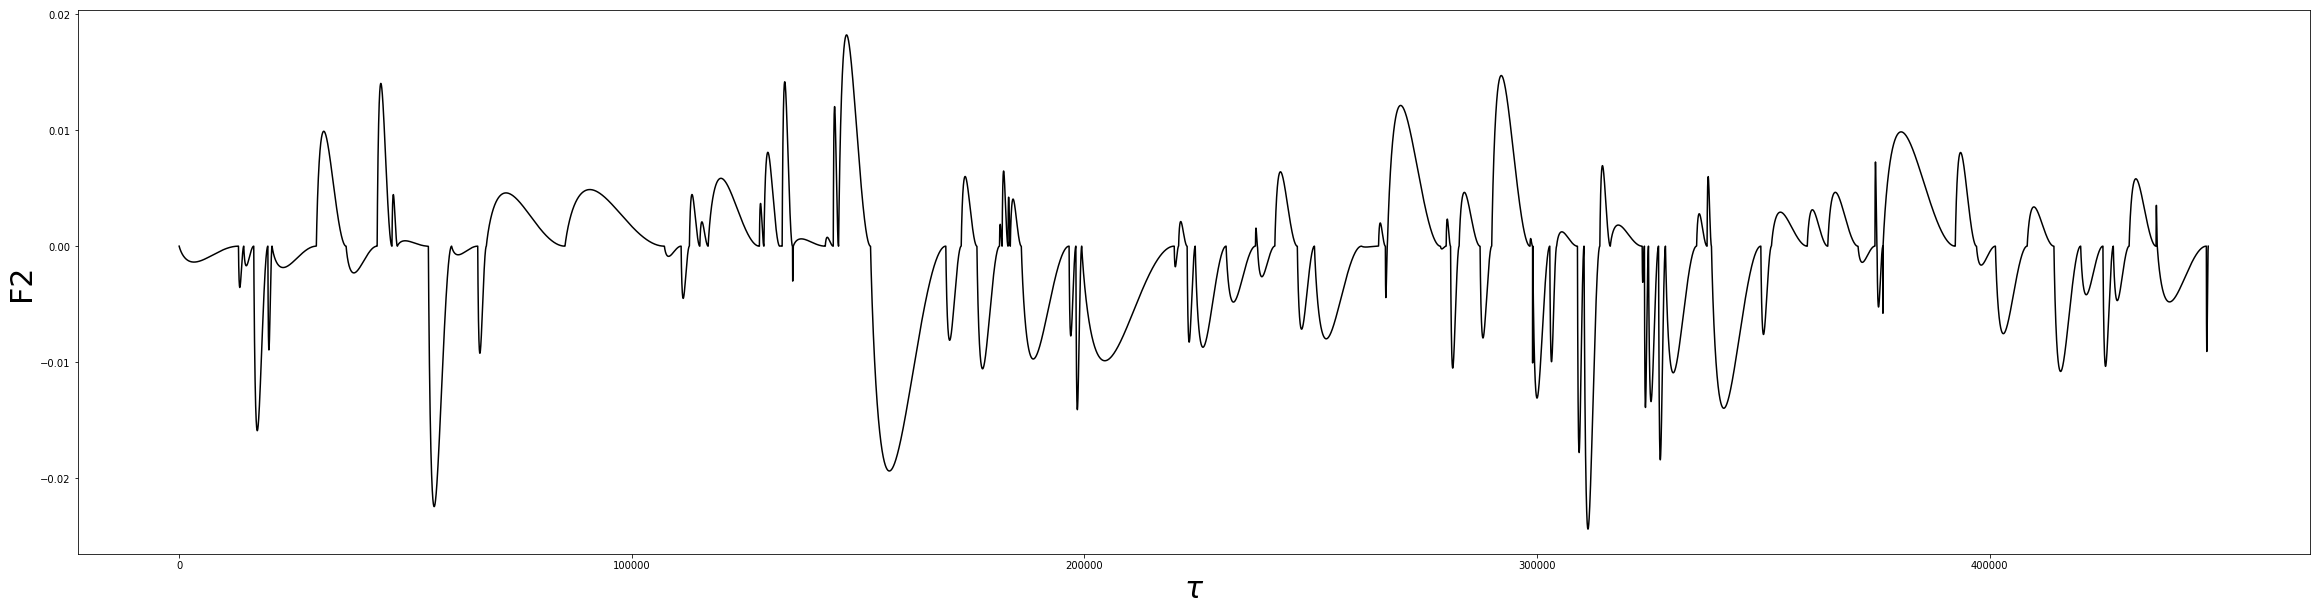

In [19]:
plt.figure(figsize=(40,10))
F2, time = funF2()
plt.plot(time, F2, 'k')
plt.xlabel(r'$\tau$', **axis_font)
plt.ylabel('F2', **axis_font)

F2sqr=[]
for i in range(len(F2)-1):
    F2sqr.append(F2[i]**2)

rms=(sum(F2sqr) / len(F2sqr) )**(1/2)
print("<F2^2>^(1/2) = ", rms)
avgF2 = sum(F2) / len(F2)
print("Average Value of F2 ", avgF2)
print("Maximum Value of F2 ", max(F2))
print("Minimum Value of F2 ", min(F2))

/Users/celiatandon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.


<F1^2>^(1/2) =  0.0001017779340899833
Average Value of F1  -1.1930899605674063e-05
Maximum Value of F2  0.0002862385276471722
Minimum Value of F1  -0.0004264641314572923


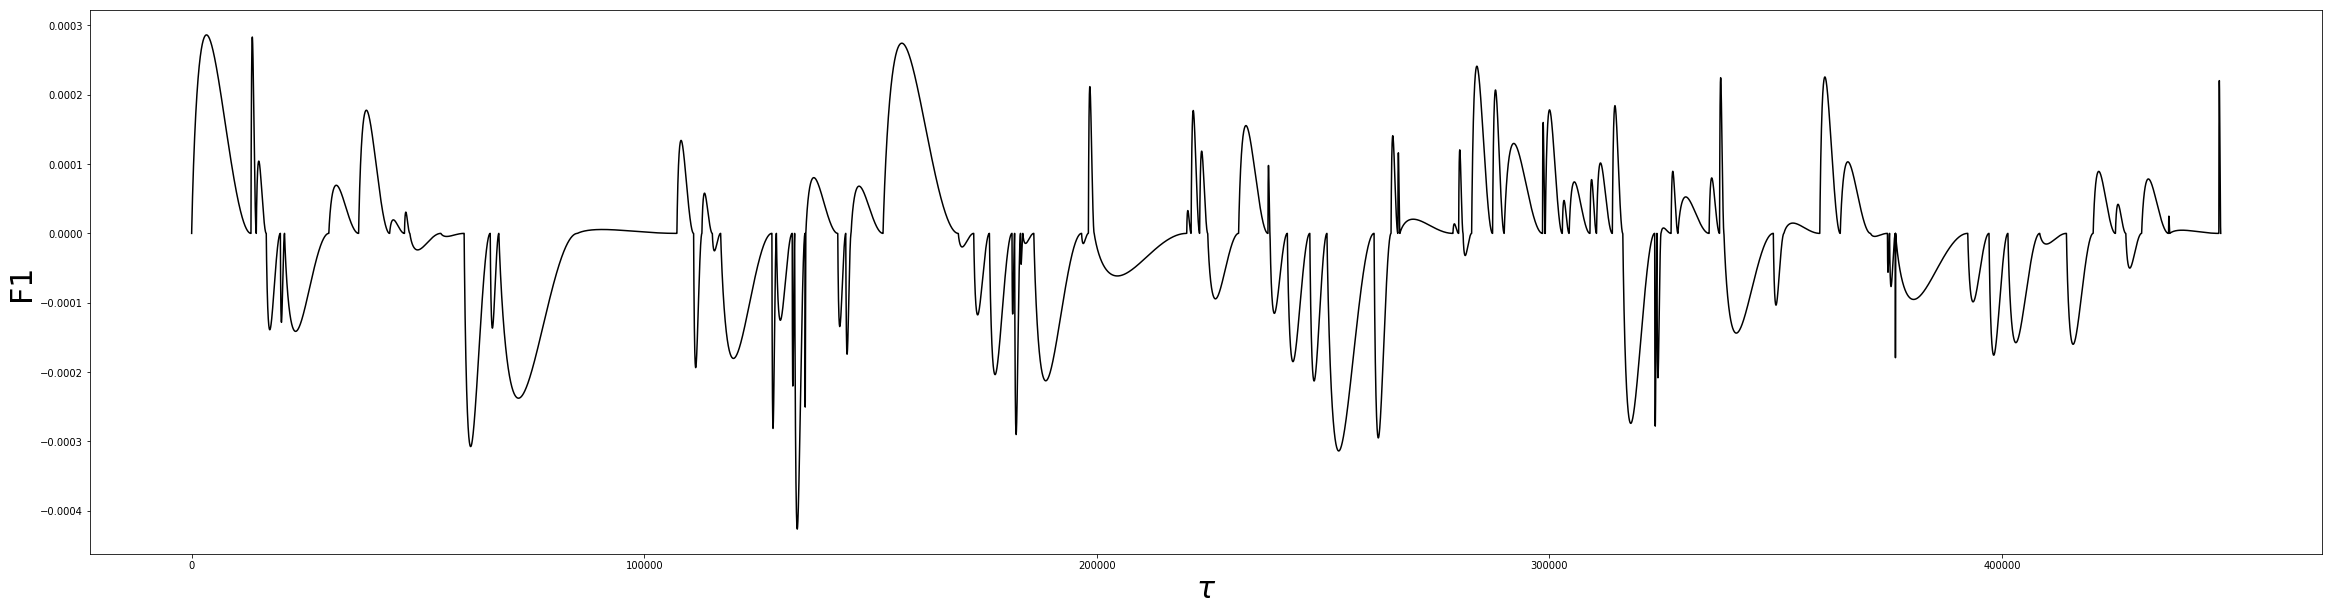

In [20]:
F1, time =funF1()
plt.figure(figsize=(40,10))
plt.plot(time, F1, 'k')
plt.xlabel(r'$\tau$', **axis_font)
plt.ylabel('F1', **axis_font)

F1sqr=[]
for i in range(len(F1)-1):
    F1sqr.append(F1[i]**2)

rms=(sum(F1sqr) / len(F1sqr) )**(1/2)
print("<F1^2>^(1/2) = ", rms)

avgF1 = sum(F1) / len(F1)
print("Average Value of F1 ", avgF1)
print("Maximum Value of F2 ", max(F1)) 
print("Minimum Value of F1 ", min(F1))

In [14]:
G1 = funG1(F1)